# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.054546e+01     7.343592e+00
 * time: 0.004263162612915039
     1     2.653621e+01     4.355576e+00
 * time: 0.012531042098999023
     2     2.192323e+01     7.403977e+00
 * time: 0.032305002212524414
     3     1.267940e+01     1.001019e+00
 * time: 0.05569601058959961
     4     1.157191e+01     1.763647e+00
 * time: 0.07132220268249512
     5     1.105325e+01     1.446324e+00
 * time: 0.0868690013885498
     6     1.048907e+01     1.446452e+00
 * time: 0.10260319709777832
     7     1.013254e+01     1.149459e+00
 * time: 0.1183631420135498
     8     9.646155e+00     1.138362e+00
 * time: 0.13437199592590332
     9     9.403033e+00     6.272653e-01
 * time: 0.15073204040527344
    10     9.204245e+00     8.254350e-01
 * time: 0.16706109046936035
    11     9.046690e+00     8.109420e-01
 * time: 0.1833631992340088
    12     8.904620e+00     1.085747e+00
 * time: 0.1956641674041748
    13     8.835016e+00     6.361738e-01
 * time: 

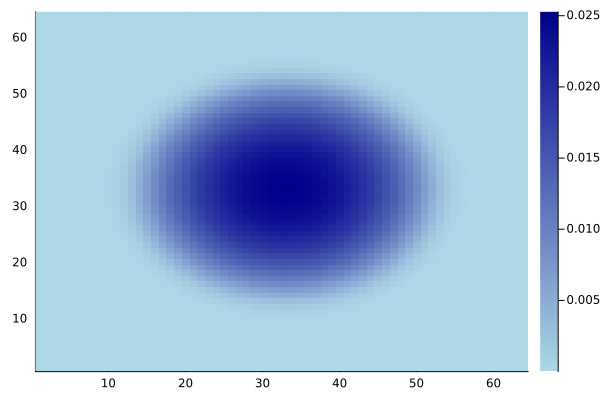

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)